In [2]:
import pandas as pd

# Goal 
* getting the college rate
* CSV files are in Analysis/data

In [3]:
education_2012_df = pd.read_csv('census_education_data_2012.csv')
education_2012_df.head()

,County,Population,No Education,High School Education,GED education,Associate Education,Bachelor Education,Masters Education,Professional Education,Doctorate Education,College,College Rate
0,Alameda,1515136.0,21320.0,183121.0,16511.0,69629.0,249246.0,116816.0,27561.0,27987.0,491239.0,32.422106
1,Alpine,1197.0,0.0,153.0,58.0,49.0,142.0,76.0,14.0,22.0,303.0,25.313283
2,Amador,37764.0,198.0,7117.0,938.0,2802.0,4042.0,825.0,417.0,138.0,8224.0,21.777354
3,Butte,220101.0,2273.0,27686.0,4560.0,12955.0,22359.0,7246.0,2598.0,1585.0,46743.0,21.237068
4,Calaveras,45507.0,87.0,8778.0,1186.0,3234.0,4988.0,1373.0,513.0,142.0,10250.0,22.524007


In [4]:
education_2012_df = education_2012_df[["County", "College Rate"]]
education_2012_df.head()

,County,College Rate
0,Alameda,32.422106
1,Alpine,25.313283
2,Amador,21.777354
3,Butte,21.237068
4,Calaveras,22.524007


In [62]:
education_2016_df = pd.read_csv('census_education_data_2016.csv')
education_2016_df.head()

,County,Population,No Education,High School Education,GED education,Associate Education,Bachelor Education,Masters Education,Professional Education,Doctorate Education,College,College Rate
0,Alameda,1605217.0,26836.0,182207.0,18164.0,74447.0,282754.0,141689.0,32639.0,31512.0,563041.0,35.075694
1,Alpine,1184.0,5.0,189.0,68.0,46.0,140.0,67.0,8.0,20.0,281.0,23.733108
2,Amador,36963.0,279.0,6562.0,1131.0,2554.0,4212.0,1192.0,540.0,240.0,8738.0,23.639856
3,Butte,223877.0,2749.0,27537.0,5238.0,14030.0,25225.0,8002.0,2915.0,1611.0,51783.0,23.130112
4,Calaveras,44787.0,310.0,8057.0,1158.0,3692.0,4645.0,1550.0,424.0,226.0,10537.0,23.526916


In [63]:
education_2016_df = education_2016_df[["County", "College Rate"]]
education_2016_df.head()

,County,College Rate
0,Alameda,35.075694
1,Alpine,23.733108
2,Amador,23.639856
3,Butte,23.130112
4,Calaveras,23.526916


In [64]:
merged_education_df = pd.merge(education_2012_df, education_2016_df, how='outer', on='County')
merged_education_df.head()

,County,College Rate_x,College Rate_y
0,Alameda,32.422106,35.075694
1,Alpine,25.313283,23.733108
2,Amador,21.777354,23.639856
3,Butte,21.237068,23.130112
4,Calaveras,22.524007,23.526916


In [65]:
merged_education_df.columns

Index(['County', 'College Rate_x', 'College Rate_y'], dtype='object')

In [66]:
merged_education_df = merged_education_df.rename(columns={'College Rate_x':'2012 College Rate',
                                                  'College Rate_y':'2016 College Rate'})

In [67]:
merged_education_df.head()

,County,2012 College Rate,2016 College Rate
0,Alameda,32.422106,35.075694
1,Alpine,25.313283,23.733108
2,Amador,21.777354,23.639856
3,Butte,21.237068,23.130112
4,Calaveras,22.524007,23.526916


In [68]:
merged_education_df.head()

,County,2012 College Rate,2016 College Rate
0,Alameda,32.422106,35.075694
1,Alpine,25.313283,23.733108
2,Amador,21.777354,23.639856
3,Butte,21.237068,23.130112
4,Calaveras,22.524007,23.526916


In [69]:
merged_education_df["College Rate Change"] = merged_education_df["2016 College Rate"] - \
    merged_education_df["2012 College Rate"]

In [70]:
merged_education_df.head()

,County,2012 College Rate,2016 College Rate,College Rate Change
0,Alameda,32.422106,35.075694,2.653588
1,Alpine,25.313283,23.733108,-1.580175
2,Amador,21.777354,23.639856,1.862502
3,Butte,21.237068,23.130112,1.893043
4,Calaveras,22.524007,23.526916,1.002909


(array([21., 24., 11.,  2.]),
 array([11.06950912, 19.47591794, 27.88232675, 36.28873557, 44.69514439]),
 <a list of 4 Patch objects>)

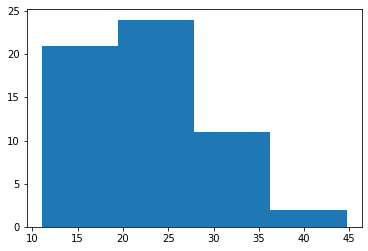

In [71]:
plt.hist(merged_education_df["2012 College Rate"], bins=4)

In [72]:
merged_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               58 non-null     object 
 1   2012 College Rate    58 non-null     float64
 2   2016 College Rate    58 non-null     float64
 3   College Rate Change  58 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


In [73]:
merged_education_df["2012 College Rate"] = merged_education_df["2012 College Rate"].map("{:.2f}".format)
merged_education_df["2016 College Rate"] = merged_education_df["2016 College Rate"].map("{:.2f}".format)
merged_education_df["College Rate Change"] = merged_education_df["College Rate Change"].map("{:.2f}".format)

In [74]:
merged_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   County               58 non-null     object
 1   2012 College Rate    58 non-null     object
 2   2016 College Rate    58 non-null     object
 3   College Rate Change  58 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [75]:
merged_education_df = merged_education_df.astype({"2012 College Rate": float, 
                                                  "2016 College Rate": float,
                                                 "College Rate Change": float})

In [76]:
merged_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               58 non-null     object 
 1   2012 College Rate    58 non-null     float64
 2   2016 College Rate    58 non-null     float64
 3   College Rate Change  58 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


(array([21., 24., 11.,  2.]),
 array([11.07  , 19.4775, 27.885 , 36.2925, 44.7   ]),
 <a list of 4 Patch objects>)

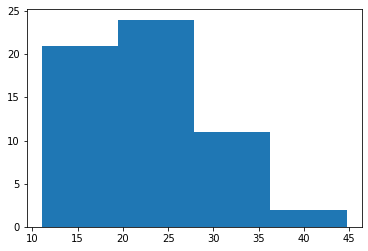

In [77]:
plt.hist(merged_education_df["2012 College Rate"], bins=4)

(array([21., 24., 10.,  3.]),
 array([12.13 , 20.945, 29.76 , 38.575, 47.39 ]),
 <a list of 4 Patch objects>)

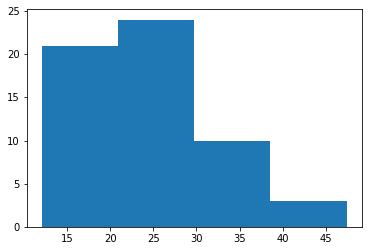

In [78]:
plt.hist(merged_education_df["2016 College Rate"], bins=4)

(array([ 6., 35., 16.,  1.]),
 array([-1.58  ,  0.1425,  1.865 ,  3.5875,  5.31  ]),
 <a list of 4 Patch objects>)

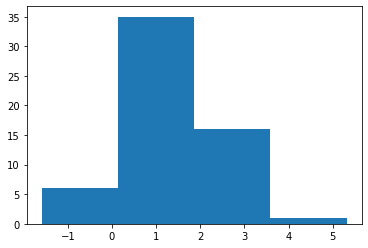

In [79]:
plt.hist(merged_education_df["College Rate Change"], bins=4)

In [81]:
merged_education_df

,County,2012 College Rate,2016 College Rate,College Rate Change
0,Alameda,32.42,35.08,2.65
1,Alpine,25.31,23.73,-1.58
2,Amador,21.78,23.64,1.86
3,Butte,21.24,23.13,1.89
4,Calaveras,22.52,23.53,1.00
5,Colusa,13.80,15.28,1.48
6,Contra Costa,31.34,32.96,1.62
7,Del Norte,14.20,16.47,2.27
8,El Dorado,29.00,31.01,2.01
9,Fresno,15.91,16.77,0.86


In [82]:
merged_education_df.to_csv("education_college_rate_differences.csv", encoding="utf-8", index=False, header=True)